In [24]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [25]:
# Load the Excel file
file_path = '../data/survey_physical_activity.csv'
df = pd.read_csv(file_path)

In [26]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Gender,Ethnicity,Education Level,General Health,Fruits_Veg_Servings_Per_Day,Physical_Activity_Per_Week,Chronic_Diseases,Physical_Activity_Level
0,1,39,Male,Ethnicity C,Master's,Poor,5 or more servings,1-2 days,Yes,Very active; physical activity is my daily rou...
1,2,31,Male,Ethnicity B,PhD,Good,1-2 servings,Not at all,No,Very active; physical activity is my daily rou...
2,3,57,Male,Ethnicity B,Master's,Good,NaN,5 or more days,Prefer not to say,Very active; physical activity is my daily rou...
3,4,61,Female,Ethnicity D,High School,Poor,NaN,1-2 days,Yes,Very active; physical activity is my daily rou...
4,5,41,Male,Ethnicity A,Bachelor's,Fair,NaN,Not at all,Yes,Very active; physical activity is my daily rou...


In [27]:
# Label encoding
df_le = df
label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Ethnicity', 'Education Level', 'General Health', 'Fruits_Veg_Servings_Per_Day', 'Physical_Activity_Per_Week', 'Chronic_Diseases', 'Physical_Activity_Level']
for column in columns_to_encode:
    df_le[f'{column}_encoded'] = label_encoder.fit_transform(df_le[column])
df_le = df_le.drop(columns=columns_to_encode)



In [28]:
# Output number of distinct types for each column
for column in df_le.columns:
    num_distinct_types = df_le[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in ID: 250
Number of distinct types in Age: 47
Number of distinct types in Gender_encoded: 3
Number of distinct types in Ethnicity_encoded: 4
Number of distinct types in Education Level_encoded: 4
Number of distinct types in General Health_encoded: 5
Number of distinct types in Fruits_Veg_Servings_Per_Day_encoded: 4
Number of distinct types in Physical_Activity_Per_Week_encoded: 4
Number of distinct types in Chronic_Diseases_encoded: 3
Number of distinct types in Physical_Activity_Level_encoded: 2


In [32]:
for column in df_le.columns:
    print(f"Count of distinct values in {column}:")
    print(df_le[column].value_counts())

Count of distinct values in ID:
ID
250    1
1      1
235    1
236    1
237    1
      ..
6      1
7      1
8      1
9      1
10     1
Name: count, Length: 250, dtype: int64
Count of distinct values in Age:
Age
31    11
64    11
61     8
47     8
20     8
33     8
37     8
22     8
23     7
32     7
60     7
28     7
29     7
39     6
57     6
40     6
35     6
59     6
27     6
52     6
56     5
48     5
53     5
42     5
63     5
26     5
30     5
43     5
25     5
58     5
34     5
44     4
41     4
36     4
19     4
46     4
55     3
50     3
24     3
45     3
18     3
38     3
54     3
51     2
62     2
21     2
49     1
Name: count, dtype: int64
Count of distinct values in Gender_encoded:
Gender_encoded
1    133
0    113
2      4
Name: count, dtype: int64
Count of distinct values in Ethnicity_encoded:
Ethnicity_encoded
0    71
2    69
3    63
1    47
Name: count, dtype: int64
Count of distinct values in Education Level_encoded:
Education Level_encoded
2    73
3    64
0    59
1    

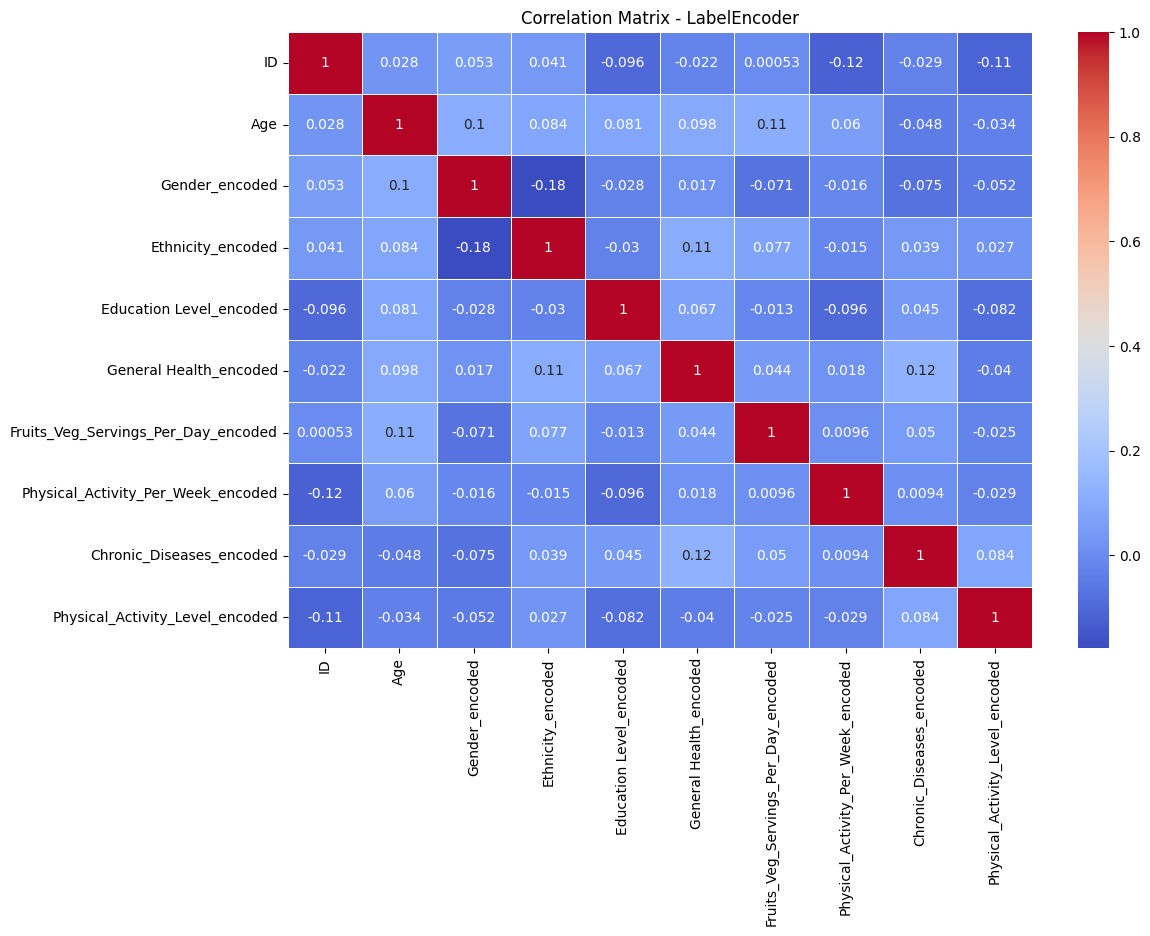

In [29]:
# Generate the correlation matrix
correlation_matrix = df_le.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - LabelEncoder')
plt.show()

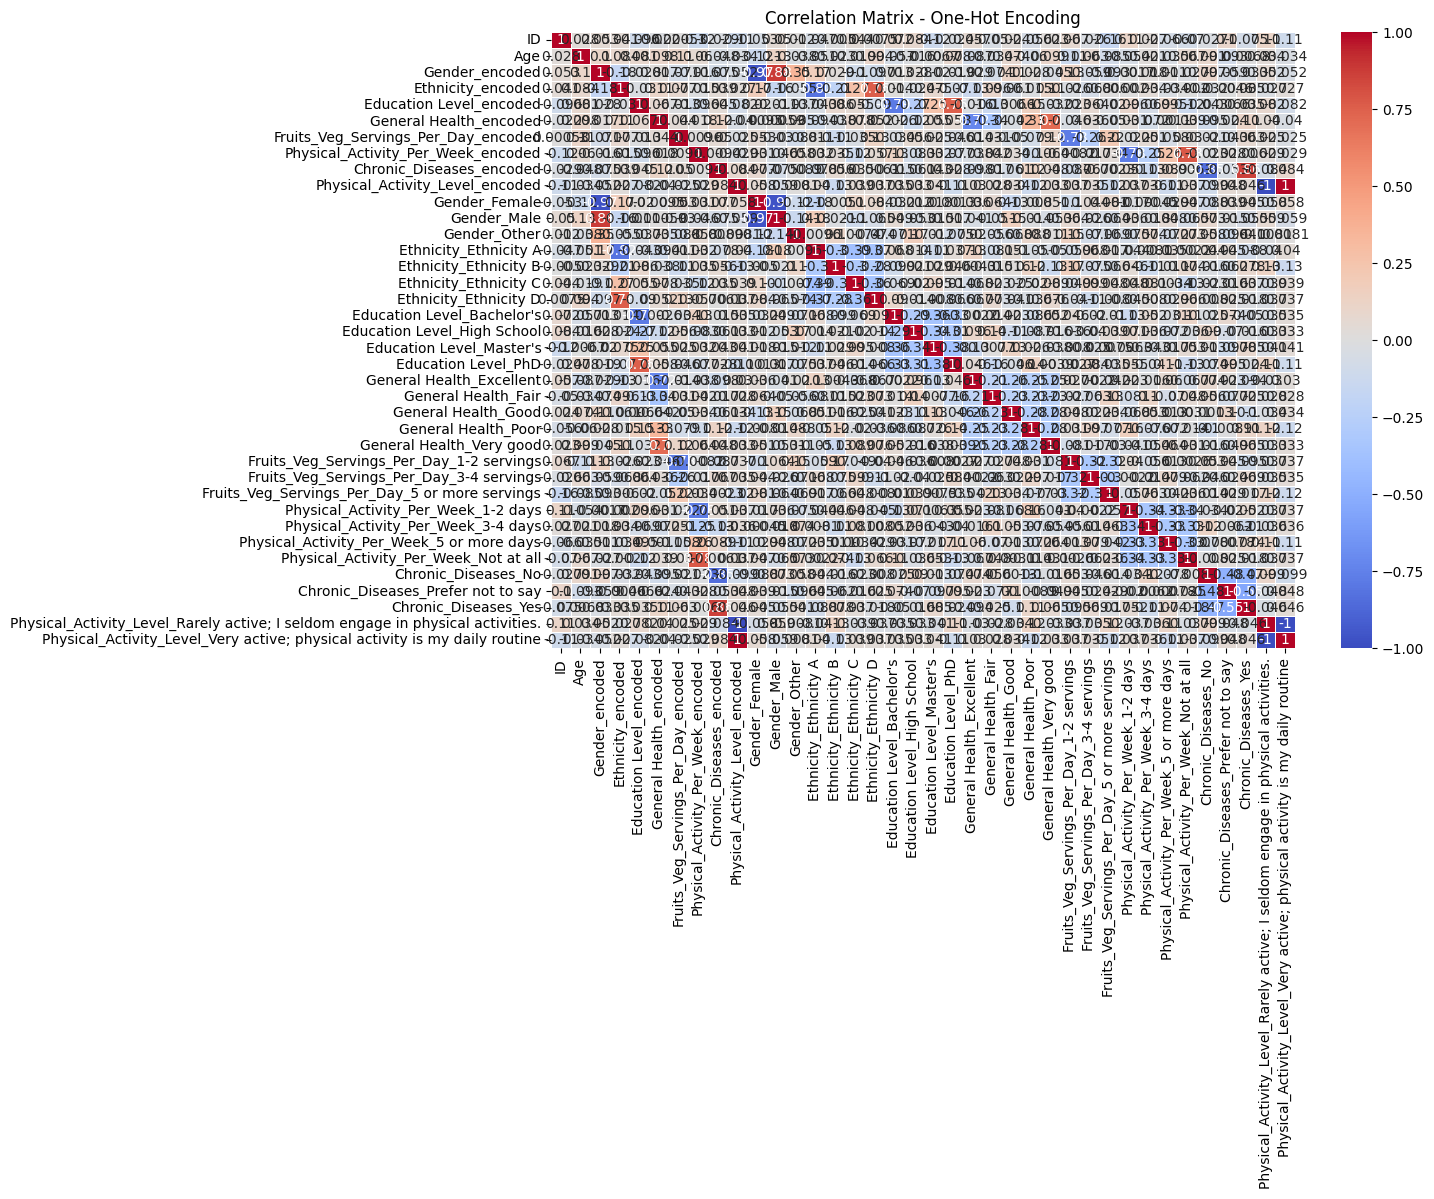

In [31]:
# One-Hot Encoding
one_hot_encoded_df = pd.get_dummies(df)

# Generate the correlation matrix
correlation_matrix = one_hot_encoded_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - One-Hot Encoding')
plt.show()